# Heart Disease Prediction

#### Dataset: https://www.kaggle.com/ronitf/heart-disease-uci


#### Importing neccessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV, StratifiedKFold, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')


#### Importing Dataset

In [2]:
df = pd.read_csv('./heart.csv')

#### Analysing Features

In [3]:
df.sample(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
177,64,1,2,140,335,0,1,158,0,0.0,2,0,2,0
46,44,1,2,140,235,0,0,180,0,0.0,2,0,2,1
27,51,1,2,110,175,0,1,123,0,0.6,2,0,2,1
232,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2,1
45,52,1,1,120,325,0,1,172,0,0.2,2,0,2,1
245,48,1,0,124,274,0,0,166,0,0.5,1,0,3,0
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2,1
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
35,46,0,2,142,177,0,0,160,1,1.4,0,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
list(df.columns)

['age',
 'sex',
 'cp',
 'trestbps',
 'chol',
 'fbs',
 'restecg',
 'thalach',
 'exang',
 'oldpeak',
 'slope',
 'ca',
 'thal',
 'target']

### Columns:

    - Age: Age in years
    - Sex: 1 = male, 0 = female
    - Cp: Chest pain type
    - Trestbps: Resting blood pressure (in mm Hg on admission to the hospital)
    - Chol: Serum cholestoral in mg/dl
    - Fbs: (fasting blood sugar &gt; 120 mg/dl) (1 = true; 0 = false)
    - Restecg: Resting electrocardiographic results
    - Thalach: Maximum heart rate achieved
    - Exang:  exercise induced angina (1 = yes; 0 = no)
    - Oldpeak: ST depression induced by exercise relative to rest
    - Slope: The slope of the peak exercise ST segment
    - Ca: number of major vessels (0-3) colored by flourosopy
    - Thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
    - Target: 1 or 0 

In [6]:
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [7]:
df.target.unique()

array([1, 0], dtype=int64)

### Data Visualization

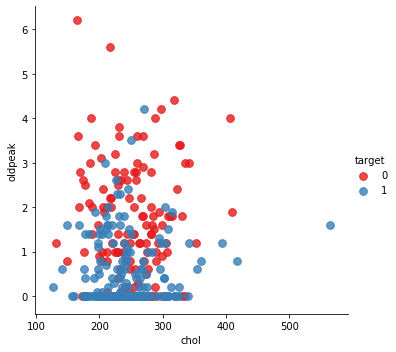

In [8]:
# Implot describing  correlation between Cholesterol and Old Peak features
sns.lmplot('chol','oldpeak',data=df, hue='target',palette='Set1', fit_reg=False, scatter_kws={"s": 60})

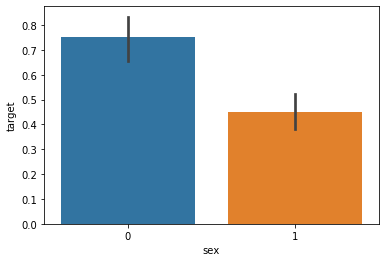

In [9]:
# Barplot describing target value based on the Sex feature
sns.barplot('sex','target',data=df)

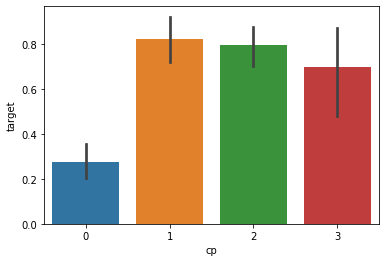

In [10]:
# Barplot describing target value based on the Cp feature
sns.barplot('cp','target',data=df)

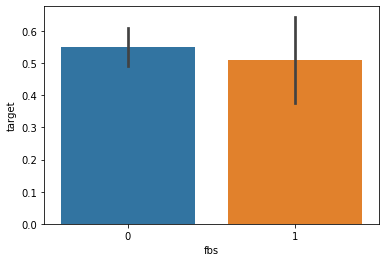

In [11]:
# Barplot describing target value based on the Fbs feature
sns.barplot('fbs','target',data=df)

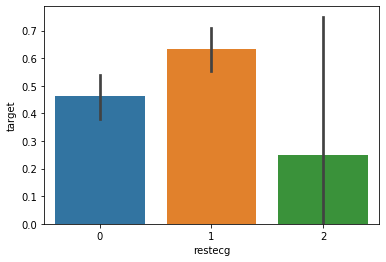

In [12]:
# Barplot describing target value based on the Restecg feature
sns.barplot('restecg','target',data=df)

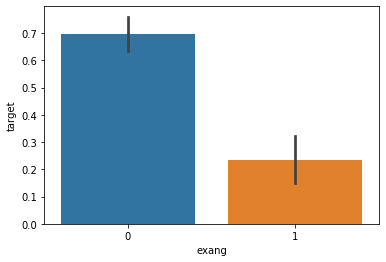

In [13]:
# Barplot describing target value based on the Exang feature

sns.barplot('exang','target',data=df)

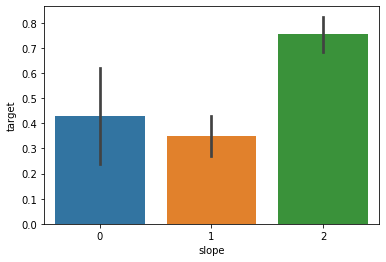

In [14]:
# Barplot describing target value based on the Slope feature
sns.barplot('slope','target',data=df)


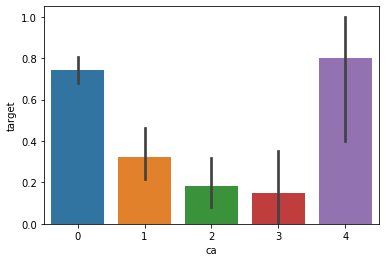

In [15]:
# Barplot describing target value based on the Ca feature
sns.barplot('ca','target',data=df)


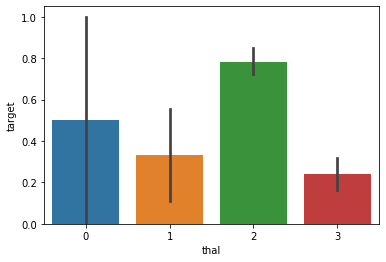

In [16]:
# Barplot describing target value based on the Thal feature
sns.barplot('thal','target',data=df)

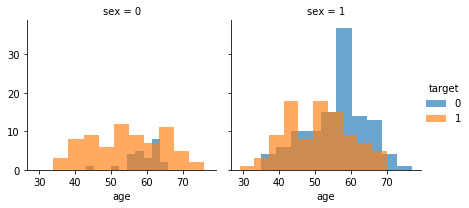

In [17]:
# Facetgrid histogram describing target value based on the age feature divided on the sex type
g = sns.FacetGrid(df, col="sex", hue="target")
g.map(plt.hist, "age",alpha=0.66);
g.add_legend();

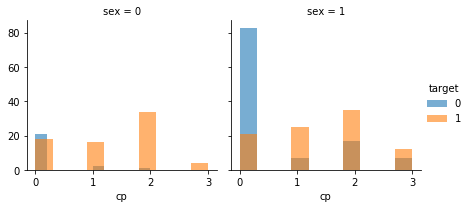

In [18]:
# Facetgrid histogram describing target value based on the Cp feature divided on the sex type
g = sns.FacetGrid(df, col="sex", hue="target")
g.map(plt.hist, "cp",alpha=0.6);
g.add_legend();

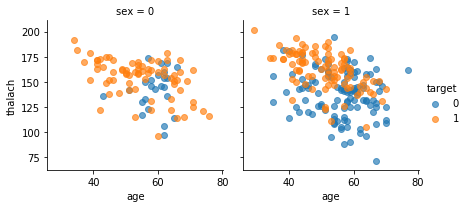

In [19]:
# Facetgrid scatterplot describing target value based on the thalach feature divided on the sex type
g = sns.FacetGrid(df, col="sex", hue="target")
g.map(plt.scatter,"age", "thalach",alpha=0.66);
g.add_legend();

#### Splitting dataset into Train Test

In [20]:
X = df.drop('target',axis=1)
y = df['target']

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
print("X train: ",X_train.shape)
print("X test: ",X_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

X train:  (242, 13)
X test:  (61, 13)
y train:  (242,)
y test:  (61,)


#### Scaling Data so every feature has the same interval of values

In [22]:
sc = StandardScaler()
X_test = sc.fit_transform(X_test)
X_train = sc.fit_transform(X_train)

#### Random Forest Classifier while using GridSearchCV for an exhaustive search over specified parameter values for the best estimator. Using the best estimator for prediction afterwards.

In [23]:
n_estimators = [140,145,150,155,160];
max_depth = range(1,10);
criterions = ['gini', 'entropy'];
cv = StratifiedShuffleSplit(n_splits=10, test_size=.30, random_state=15)

parameters = {'n_estimators':n_estimators, 'max_depth':max_depth, 'criterion': criterions }

grid = GridSearchCV(estimator=RandomForestClassifier(max_features='auto'),
                                 param_grid=parameters,
                                 cv=cv,
                                 n_jobs = -1)
grid.fit(X_train,y_train) 


print(grid.best_estimator_)
print(grid.best_score_)
print(grid.best_params_)
print(grid.best_index_)

y_pred = grid.best_estimator_.predict(X_test)

print(classification_report(y_test,y_pred))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=3, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=160,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.8479452054794521
{'criterion': 'gini', 'max_depth': 3, 'n_estimators': 160}
14
              precision    recall  f1-score   support

           0       0.88      0.70      0.78        30
           1       0.76      0.90      0.82        31

    accuracy                           0.80        61
   macro avg       0.82      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



#### K Nearest Neighbours

In [24]:
knc = KNeighborsClassifier()
knc.fit(X_train,y_train)

y_pred = knc.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.78      0.70      0.74        30
           1       0.74      0.81      0.77        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61



#### Gaussian Naive Bayes

In [25]:
gaussian = GaussianNB()
gaussian.fit(X_train, y_train)
y_pred = gaussian.predict(X_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.73      0.79        30
           1       0.77      0.87      0.82        31

    accuracy                           0.80        61
   macro avg       0.81      0.80      0.80        61
weighted avg       0.81      0.80      0.80        61



#### Support Vector Classifier

In [26]:
svc = SVC(kernel ='linear')
svc.fit(X_train,y_train)

y_pred = svc.predict(X_test)

print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.80      0.67      0.73        30
           1       0.72      0.84      0.78        31

    accuracy                           0.75        61
   macro avg       0.76      0.75      0.75        61
weighted avg       0.76      0.75      0.75        61

